In [2]:
import pandas as pd
import numpy as np

def real_wage_df(df1, df2, s, param1, param2):
    nw = pd.DataFrame(df1['год'])
    nw['data'] = df1[s]
    nw['parameter'] = [param1] * len(nw)

    rw = pd.DataFrame(df1['год'])
    rw['data'] = df1[s] / ((100 + df2['Всего'])/100)
    rw['parameter'] = [param2] * len(rw)

    return pd.concat([nw, rw], ignore_index=True)

def wage_rate_df(df1, df2, s, param1, param2):
    nwr = pd.DataFrame(df1['год'].iloc[1:])
    arr = list(df1[s])
    res = []
    for i in range(1, len(arr)):
        res.append(arr[i] / arr[i-1])

    xs = np.array(res) * 100

    ys = df2['Всего'].iloc[1:]
    nwr['data'] = 100 + ys
    nwr['parameter'] = [param1] * len(nwr)

    rwr = pd.DataFrame(df1['год'].iloc[1:])
    rwr['data'] = 100*xs / nwr['data']
    rwr['parameter'] = [param2] * len(rwr)

    return pd.concat([nwr, rwr], ignore_index=True)

def to_base_year(df1, df2, param1, param2):
    cpi = df1.iloc[1:]
    lst = list(cpi['Всего'])
    res = []
    t = 1
    for i in range(len(lst)):
            t = t * ((100 + lst[i])/100)
            res.append(t)

    xs = 100 * np.array(res)

    rwr = df2.loc[df2['parameter']==param2]
    ls = list(rwr.data)
    res = []
    t = 1
    for i in range(len(ls)):
            t = t * ls[i] / 100
            res.append(t)

    ys = 100*np.array(res)

    c_rate = pd.DataFrame(df['год'].iloc[1:])
    c_rate['data'] = xs
    c_rate['parameter'] = [param1] * len(c_rate)

    r_rate = pd.DataFrame(df['год'].iloc[1:])
    r_rate['data'] = ys
    r_rate['parameter'] = [param2] * len(c_rate)
    return pd.concat([c_rate, r_rate], ignore_index=True)

def plot_chart(df, title):
    base = alt.Chart(df).encode(
    alt.Color('parameter'),
    alt.X(
        'год',
        axis = alt.Axis(title='год')))

    chart = base.mark_line(
    point=alt.OverlayMarkDef(filled=False, fill="white")
    ).encode(
    alt.Y('data', title=title))
    return chart


df = pd.read_csv('data/out.csv')
df = df.drop(['производство пищевых продуктов, включая напитки, и табака'], axis=1)
df['год'] = pd.to_datetime(df['год'], format='%Y')
inflation = pd.read_csv('data/inflation.csv').sort_values('Год').reset_index()

In [4]:
sbox = [
     'сельское хозяйство, охота и лесное хозяйство',
     'рыболовство, рыбоводство',
     'производство электрооборудования, электронного и оптического оборудования',
]

In [32]:
nrw_df = real_wage_df(df, inflation, sbox[0], 'НЗП', 'РЗП')
nrw_df2 = real_wage_df(df, inflation, sbox[1], 'НЗП', 'РЗП')
nrw_df3 = real_wage_df(df, inflation, sbox[2], 'НЗП', 'РЗП')
wr_df = wage_rate_df(df, inflation, sbox[0], 'ИПЦ', 'ИРЗП')
wr_df2 = wage_rate_df(df, inflation, sbox[1], 'ИПЦ', 'ИРЗП')
wr_df3 = wage_rate_df(df, inflation, sbox[2], 'ИПЦ', 'ИРЗП')
cr_df = to_base_year(inflation, wr_df, 'ИПЦ', 'ИРЗП')


In [25]:
xs = nrw_df['год'].loc[nrw_df.parameter == 'НЗП']
ys_1 = nrw_df['data'].loc[nrw_df.parameter == 'НЗП']
ys_2 = nrw_df2['data'].loc[nrw_df.parameter == 'НЗП']
ys_3 = nrw_df3['data'].loc[nrw_df.parameter == 'НЗП']

In [26]:
import matplotlib.pyplot as plt

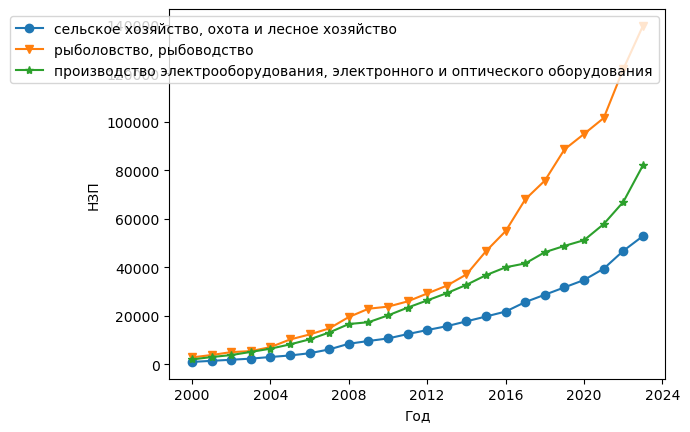

In [31]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(xs, ys_1, label='сельское хозяйство, охота и лесное хозяйство', marker='o')
ax.plot(xs, ys_2, label='рыболовство, рыбоводство', marker='v')
ax.plot(xs, ys_3, label='производство электрооборудования, электронного и оптического оборудования', marker='*')
ax.set_xlabel('Год')
ax.set_ylabel('НЗП')
ax.legend()
plt.show()

С 2000 по 2023 год наблюдается рост номинальной заработной платы. Причем наибольшее значение заработных плат
наблюдается в рыболовстве и рыбоводстве, самые низкие в сельском хозяйстве

In [37]:
xs = nrw_df['год'].iloc[1:24]
ys_1 = wr_df['data'].loc[wr_df.parameter == 'ИРЗП']
ys_2 = wr_df2['data'].loc[wr_df2.parameter == 'ИРЗП']
ys_3 = wr_df3['data'].loc[wr_df3.parameter == 'ИРЗП']

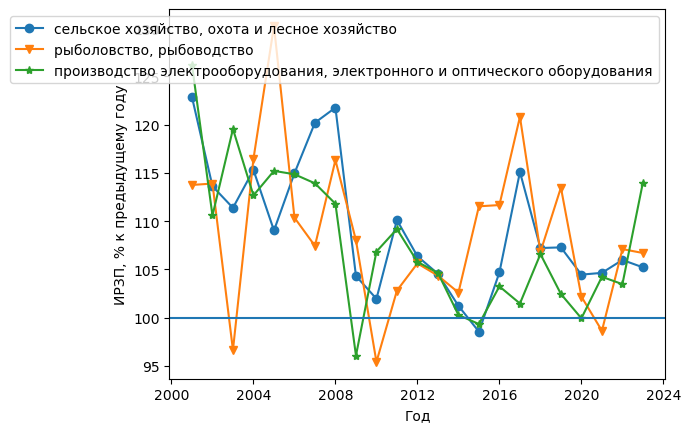

In [42]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(xs, ys_1, label='сельское хозяйство, охота и лесное хозяйство', marker='o')
ax.plot(xs, ys_2, label='рыболовство, рыбоводство', marker='v')
ax.plot(xs, ys_3, label='производство электрооборудования, электронного и оптического оборудования', marker='*')
ax.set_xlabel('Год')
ax.set_ylabel('ИРЗП, % к предыдущему году')
ax.axhline(100)
ax.legend()
plt.show()

С 2000 по 2008 год наблюдается рост заработных плат, который выше уровня инфляции (ИРЗП порядка 110-120% к предыдущему году). Причина -перестройка экономики после кризиса 1998 года, рост цен на энергоносители. Снижение реальной заработной платы происходит во время экономического кризиса 2008 года. После которого происходит рост реальной заработной платы. Следующий спад связан с геополитическими событиями 2014 года, которые привели к снижению реальной заработной платы из-за введения санкций. ВВедение контрсанкций привело к увеличению инвестиций в сельское и рыбное хозяйство, что привело к увеличению реальных заработных плат в отраслях. Рост реальной заработной платы в произдстве электрооборудования произошел в первую очередь из-за реализации госпрограммы вооружений и внедрения политики импортозамещения. Большая часть графиков и визуализации в приложении